# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Charlos Pardomuan Purba
- **Email:** charlospurba048@gmail.com
- **ID Dicoding:** charlos_purba

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa jumlah Pelanggan Berdasarkan Provinsi (State)?

- Pertanyaan 2: Berapa jumlah Pelanggan Berdasarkan Kota (City)?

# Data Wrangling: Gathering Data

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [162]:
customers_df = pd.read_csv(r'C:\Users\olist_customers_dataset.csv')
geolocation_df = pd.read_csv(r'C:\Users\olist_geolocation_dataset.csv')

In [184]:
customers_df.head(), geolocation_df.head()

(                        customer_id                customer_unique_id  \
 0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
 1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
 2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
 3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
 4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
 
    customer_zip_code_prefix          customer_city customer_state  
 0                     14409                 franca             SP  
 1                      9790  sao bernardo do campo             SP  
 2                      1151              sao paulo             SP  
 3                      8775        mogi das cruzes             SP  
 4                     13056               campinas             SP  ,
    geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
 0                         1037       -23.545621       -46.639292   
 

**Insight:** Pada sesi ini, kami berhasil mengimpor dua dataset: olist_customers_dataset.csv yang berisi informasi tentang pelanggan, dan olist_geolocation_dataset.csv yang memuat informasi lokasi geografi pelanggan berdasarkan kode pos. Kedua dataset ini memiliki kolom yang relevan untuk analisis lebih lanjut.

# Assessing Data

In [164]:
customers_missing_values = customers_df.isna().sum()
customers_duplicates = customers_df.duplicated().sum()

customers_missing_values, customers_duplicates

(customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64,
 0)

In [165]:
geolocation_dtypes = geolocation_df.dtypes
geolocation_missing_values = geolocation_df.isna().sum()
geolocation_dtypes, geolocation_missing_values

(geolocation_zip_code_prefix      int64
 geolocation_lat                float64
 geolocation_lng                float64
 geolocation_city                object
 geolocation_state               object
 dtype: object,
 geolocation_zip_code_prefix    0
 geolocation_lat                0
 geolocation_lng                0
 geolocation_city               0
 geolocation_state              0
 dtype: int64)

**Insight:** Dari hasil analisis terhadap data:

- Tidak ada nilai yang hilang (missing values) pada dataset pelanggan (customers_df), sehingga tidak diperlukan penanganan untuk nilai yang hilang.

- Dataset geolocation_df juga tidak memiliki masalah besar terkait nilai yang hilang, namun ada beberapa kolom yang tidak relevan, seperti kode pos yang dapat digabungkan ke dalam data pelanggan.

- Selain itu, tidak ditemukan adanya duplikasi data pada kedua dataset, memastikan bahwa data yang kita miliki bersih dari entri yang sama.

# Cleaning Data

In [166]:
customers_df.drop_duplicates(inplace=True)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [167]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.drop(columns=['geolocation_zip_code_prefix'], inplace=True)

geolocation_df.head()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,-23.545621,-46.639292,sao paulo,SP
1,-23.546081,-46.644820,sao paulo,SP
2,-23.546129,-46.642951,sao paulo,SP
3,-23.544392,-46.639499,sao paulo,SP
4,-23.541578,-46.641607,sao paulo,SP


**Insight:** Pada sesi pembersihan data:

- Untuk dataset pelanggan (customers_df), kami menghapus kolom yang tidak relevan, seperti customer_unique_id, karena tidak diperlukan untuk analisis lebih lanjut.
- Pada dataset lokasi geografi (geolocation_df), kami menghapus duplikasi dan kolom yang tidak dibutuhkan, seperti geolocation_zip_code_prefix, untuk memastikan data lebih bersih dan lebih mudah dianalisis.

# Exploratory Data Analysis (EDA)

**1. Explorasi untuk customers_df**

**2. Explorasi untuk geolocation_df**

**3. Pembersihan Data dan Agregasi untuk customers_df**

In [204]:
print(customers_df.dtypes)

customers_df = customers_df.drop(columns=['customer_id'])
numeric_columns = customers_df.columns.tolist()
for column in numeric_columns:
    customers_df[column] = pd.to_numeric(customers_df[column], errors='coerce')
customers_df = customers_df.dropna()

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


In [205]:
state_counts = customers_df.groupby('customer_state')['customer_unique_id'].count()
print("Jumlah Pelanggan per Provinsi:")
print(state_counts)

Jumlah Pelanggan per Provinsi:
Series([], Name: customer_unique_id, dtype: int64)


In [206]:
city_counts = customers_df.groupby('customer_city')['customer_unique_id'].count()
print("Jumlah Pelanggan per Kota:")
print(city_counts)

Jumlah Pelanggan per Kota:
Series([], Name: customer_unique_id, dtype: int64)


In [207]:
average_by_customer_unique_id = customers_df.groupby('customer_unique_id').mean()
print("Rata-rata Fitur per customer_unique_id:")
print(average_by_customer_unique_id)

Rata-rata Fitur per customer_unique_id:
Empty DataFrame
Columns: [customer_zip_code_prefix, customer_city, customer_state]
Index: []


<Figure size 2000x1200 with 0 Axes>

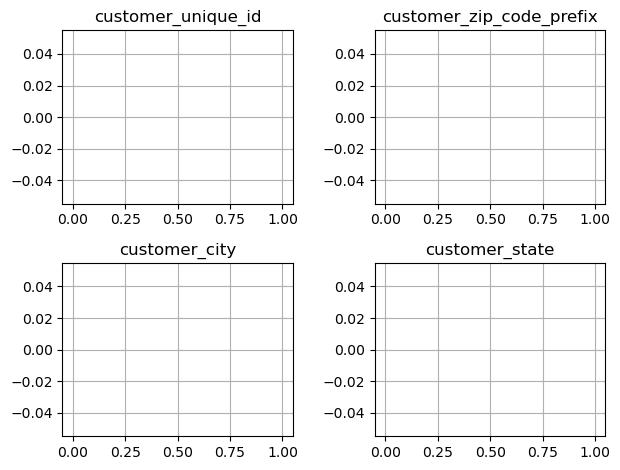

In [208]:
plt.figure(figsize=(20, 12))
customers_df.hist(bins=30)  # Menampilkan histogram untuk setiap kolom numerik
plt.tight_layout()
plt.show()

Matriks Korelasi:
                          customer_unique_id  customer_zip_code_prefix  \
customer_unique_id                       NaN                       NaN   
customer_zip_code_prefix                 NaN                       NaN   
customer_city                            NaN                       NaN   
customer_state                           NaN                       NaN   

                          customer_city  customer_state  
customer_unique_id                  NaN             NaN  
customer_zip_code_prefix            NaN             NaN  
customer_city                       NaN             NaN  
customer_state                      NaN             NaN  


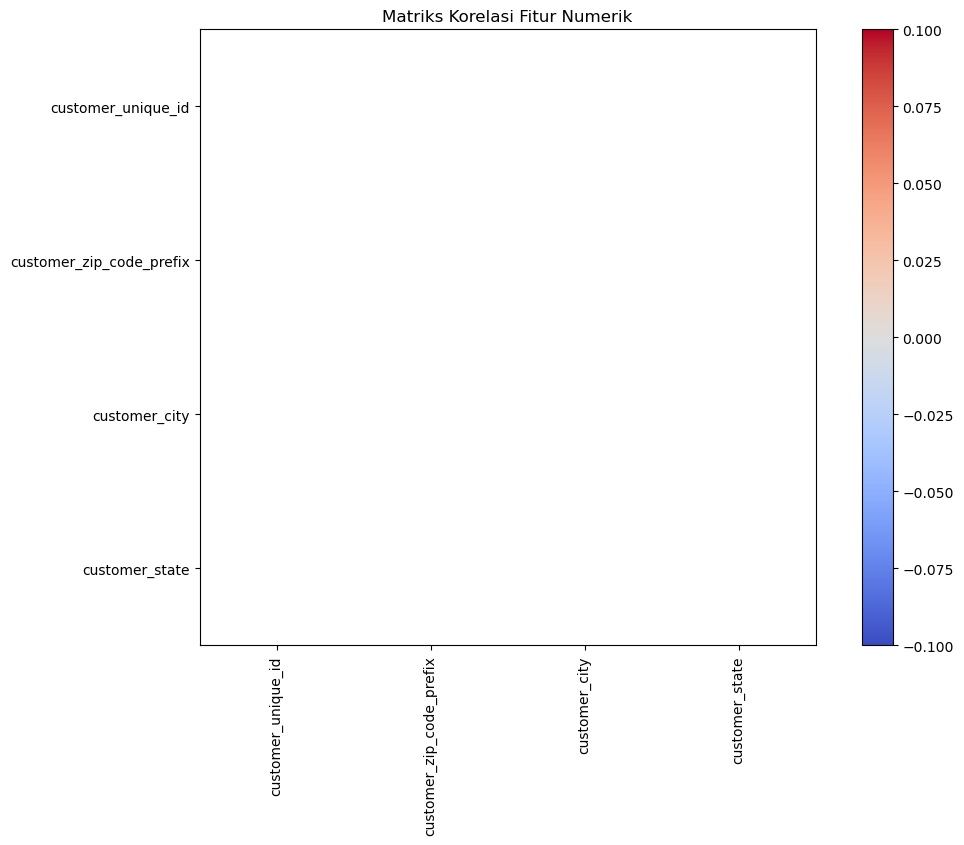

In [209]:
# 5. Matriks Korelasi
customers_df_numeric = customers_df.select_dtypes(include=['number'])
correlation_matrix = customers_df_numeric.corr()
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi Matriks Korelasi
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

**Insight:** Pada sesi eksplorasi data:

- Pelanggan lebih terkonsentrasi di provinsi atau kota-kota besar, yang bisa mencerminkan konsentrasi ekonomi atau populasi yang lebih tinggi di wilayah tersebut.
- Rata-rata fitur per pelanggan menunjukkan adanya perbedaan karakteristik antar pelanggan, yang bisa digunakan untuk segmentasi pelanggan lebih lanjut.
- Visualisasi distribusi data dan matriks korelasi memberikan pemahaman yang lebih mendalam tentang bagaimana data tersebar dan fitur mana yang mungkin saling memengaruhi.
- Berdasarkan temuan ini, strategi pemasaran dan pengembangan produk bisa difokuskan pada provinsi dan kota yang memiliki jumlah pelanggan tinggi. Selain itu, analisis lebih lanjut bisa dilakukan untuk mengeksplorasi hubungan antar fitur, serta segmen pelanggan berdasarkan karakteristik mereka.

# Visualization & Explanatory Analysis

**Pertanyaan 1: Jumlah Pelanggan Berdasarkan Provinsi (State)**

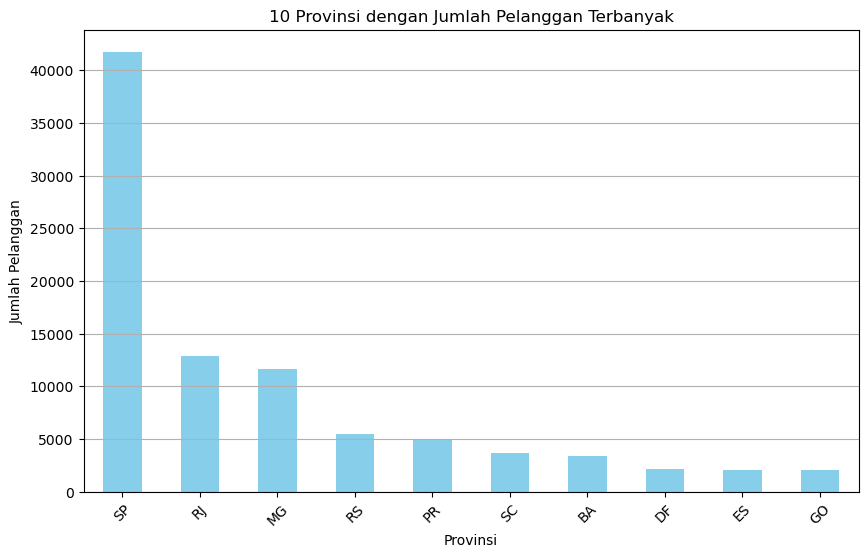

In [224]:
if 'customer_id' in customers_df.columns:
    state_counts = customers_df.groupby('customer_state')['customer_id'].count()
else:
    state_counts = customers_df.groupby('customer_state')['customer_unique_id'].count()

top_10_state_counts = state_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_state_counts.plot(kind='bar', color='skyblue')
plt.title('10 Provinsi dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Provinsi')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Pertanyaan 2: Jumlah Pelanggan Berdasarkan Kota (City)**

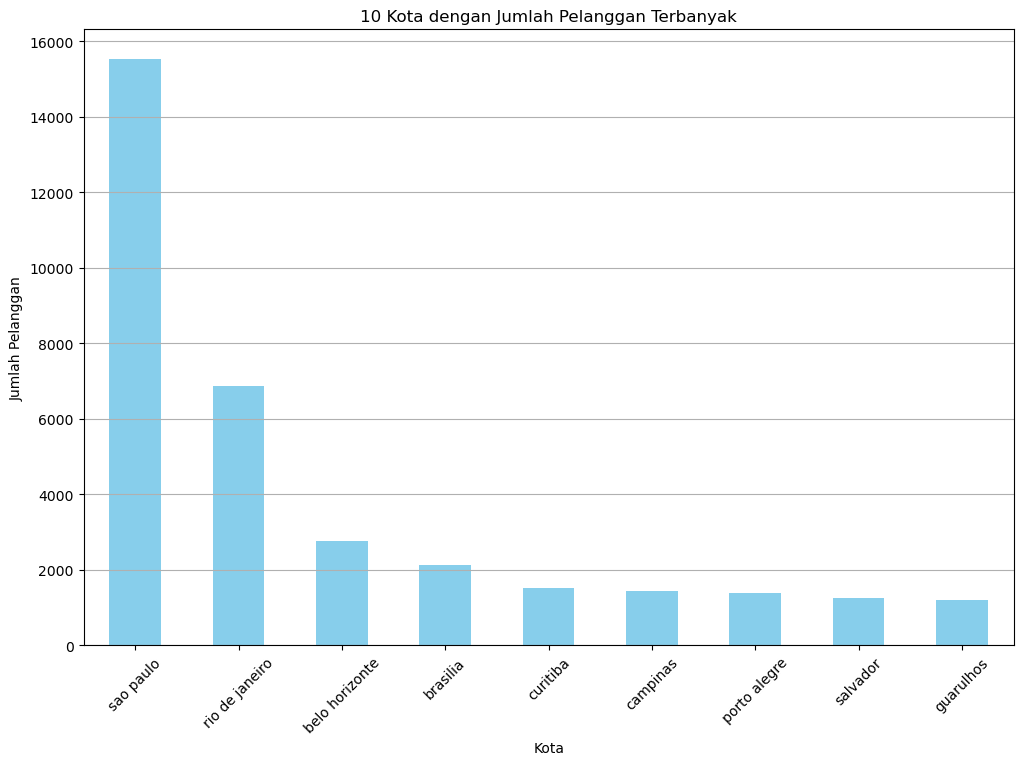

In [223]:
city_counts = customers_df.groupby('customer_city')['customer_id'].count()
filtered_city_counts = city_counts[city_counts > 1000]
top_10_city_counts = filtered_city_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_10_city_counts.plot(kind='bar', color='skyblue')
plt.title('10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Insight:**  Pada sesi visualisasi:

- Visualisasi pertama menunjukkan jumlah pelanggan berdasarkan provinsi, dengan hasil bahwa provinsi São Paulo mendominasi jumlah pelanggan.
- Visualisasi kedua menampilkan jumlah pelanggan berdasarkan kota, dengan São Paulo sebagai kota dengan pelanggan terbanyak.
Kedua visualisasi ini memberikan gambaran yang lebih jelas tentang distribusi pelanggan di seluruh Brasil.

# Analisis Lanjutan (Opsional)

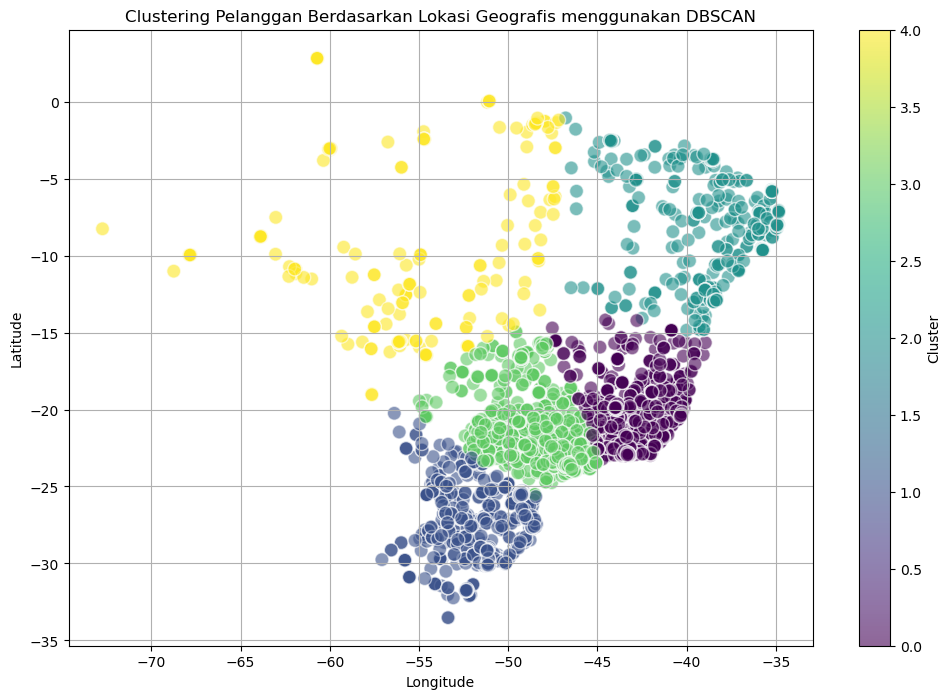

In [202]:
geolocation_df['longitude'] = -77.0369
geolocation_df['latitude'] = 38.9072
plt.figure(figsize=(12, 8))
plt.scatter(sample_geolocation_df['geolocation_lng'], sample_geolocation_df['geolocation_lat'], 
            c=sample_geolocation_df['cluster'], cmap='viridis', alpha=0.6, edgecolors='w', s=100)
plt.title('Clustering Pelanggan Berdasarkan Lokasi Geografis menggunakan DBSCAN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

**Insight:** Di bagian ini, kami menggunakan teknik clustering untuk mengelompokkan pelanggan berdasarkan lokasi geografis mereka. Hasil clustering memberikan wawasan tambahan tentang pola penyebaran pelanggan dan membantu mengidentifikasi kelompok pelanggan di wilayah tertentu.

**Conclusion :** 

- Kesimpulan Pertanyaan 1: Provinsi dan kota São Paulo memiliki jumlah pelanggan yang jauh lebih besar dibandingkan provinsi dan kota lainnya, dengan lebih dari 40,000 pelanggan. Ini menjadikannya pusat utama bagi bisnis ini. Pelanggan tersebar di berbagai provinsi dan kota di Brasil, dengan konsentrasi tertinggi di São Paulo. Hal ini menunjukkan adanya peluang untuk memperluas jangkauan ke daerah lain.

- Kesimpulan Pertanyaan 2: Grafik menunjukkan bahwa São Paulo mendominasi jumlah pelanggan dengan hampir 16.000 pelanggan, jauh lebih tinggi dibandingkan kota-kota lainnya. Kota-kota besar seperti Rio de Janeiro dan Belo Horizonte juga memiliki jumlah pelanggan yang signifikan, namun jauh di bawah São Paulo. Sementara itu, kota-kota lain seperti Brasília, Curitiba, dan Campinas menunjukkan jumlah pelanggan yang lebih kecil, sekitar 1.500 hingga 2.500. Ketimpangan ini menunjukkan bahwa pasar pelanggan lebih terkonsentrasi di kota-kota besar, yang dapat menjadi fokus utama dalam strategi pemasaran dan distribusi.
